<a href="https://colab.research.google.com/github/Nikitaa19/Placement-Prediction/blob/main/Placement_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df.shape

(100, 4)

Pre-Processing

In [ ]:
df=df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


EDA

In [ ]:
import matplotlib.pyplot as plt

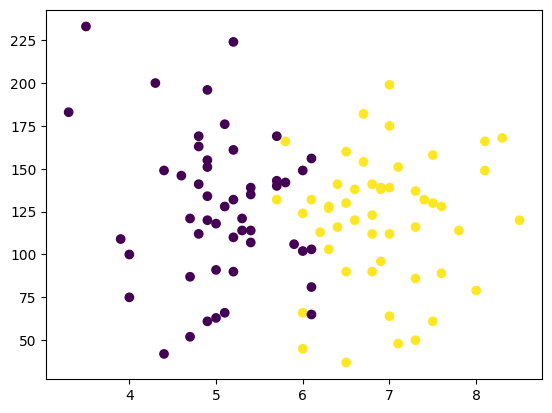

In [ ]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

Extraction

In [ ]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y.shape

(100,)

Train Test and Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.1)

In [ ]:
X_train

,cgpa,iq
45,6.0,66.0
80,4.9,196.0
66,6.9,96.0
48,6.6,138.0
85,5.8,166.0
...,...,...
79,6.5,90.0
16,5.2,224.0
59,4.8,112.0
84,5.7,169.0


In [ ]:
y_train

45    1
80    0
66    1
48    1
85    1
     ..
79    1
16    0
59    0
84    0
17    0
Name: placement, Length: 90, dtype: int64

In [ ]:
X_test

,cgpa,iq
20,6.6,120.0
78,6.1,81.0
27,6.0,124.0
25,5.0,91.0
64,7.0,64.0
21,7.1,151.0
34,4.8,163.0
86,5.1,128.0
83,7.5,130.0
2,5.3,121.0


In [ ]:
y_test

20    1
78    0
27    1
25    0
64    1
21    1
34    0
86    0
83    1
2     0
Name: placement, dtype: int64

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_train

array([[ 0.01342137, -1.43179061],
       [-0.93566117,  1.76209883],
       [ 0.78994344, -0.6947392 ],
       [ 0.53110275,  0.33713277],
       [-0.15913909,  1.02504742],
       [ 1.99786667,  1.07418418],
       [ 1.56646552, -0.25250835],
       [-0.24541932,  0.18972249],
       [ 1.39390506,  0.09144897],
       [ 0.70366321, -0.84214948],
       [-0.67682048,  0.90220552],
       [-0.76310071,  1.27073123],
       [ 0.01342137, -1.9477266 ],
       [-0.84938094, -0.15423483],
       [-1.19450186,  0.53367982],
       [-0.24541932,  0.45997468],
       [ 0.87622368,  0.36170115],
       [ 0.35854229, -0.20337159],
       [-0.50426001, -0.42448702],
       [ 0.0997016 ,  0.18972249],
       [ 0.27226206, -0.52276054],
       [-1.10822163, -1.77574793],
       [-1.0219414 ,  1.09875256],
       [-0.93566117,  0.65652172],
       [-0.67682048, -0.84214948],
       [-0.50426001,  0.26342763],
       [ 0.61738298,  0.73022686],
       [-1.36706232, -2.02143174],
       [ 0.18598183,

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
X_test

array([[ 0.53110275, -0.10509807],
       [ 0.0997016 , -1.0632649 ],
       [ 0.01342137, -0.00682455],
       [-0.84938094, -0.8175811 ],
       [ 0.87622368, -1.48092737],
       [ 0.96250391,  0.65652172],
       [-1.0219414 ,  0.95134228],
       [-0.76310071,  0.09144897],
       [ 1.30762483,  0.14058573],
       [-0.59054025, -0.08052969]])

Training

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf=LogisticRegression()

In [ ]:
#model training
clf.fit(X_train, y_train)

LogisticRegression()

Evaluation

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
y_test

20    1
78    0
27    1
25    0
64    1
21    1
34    0
86    0
83    1
2     0
Name: placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.9

Decision Boundry

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

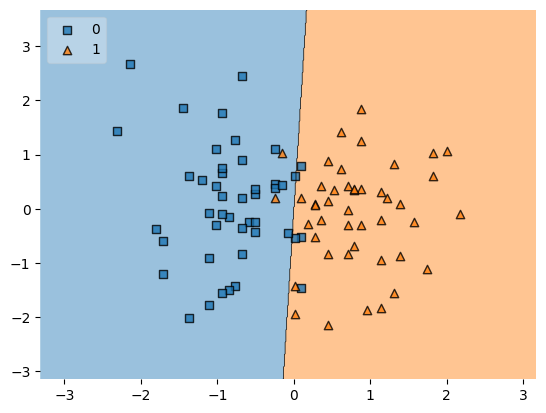

In [ ]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

Deployment

In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open('model.pkl','wb'))